# ECG Arrhythmia Classification - Patient Holdout Method

## Objective:
This notebook implements classification of ECG arrhythmias using the **patient holdout validation protocol**. We train and evaluate the same two classifiers used in beat holdout:
1. Support Vector Machine (SVM) with RBF kernel
2. Random Forest Classifier

## Patient Holdout Method:
- **Held-out Patients:** 5 specific patients (104, 113, 119, 208, 210) reserved entirely for testing
- **Training Patients:** 43 remaining patients used for training
- **No Overlap:** Model never sees any beats from the 5 test patients during training
- **More Realistic:** Tests true generalization to completely unseen patients
- **Classes:** 8 arrhythmia types, balanced through resampling (25,044 samples each in training)

## Key Difference from Beat Holdout:
Unlike beat holdout where the same patient's beats appear in both train and test, patient holdout ensures complete patient separation. This typically results in:
- Lower accuracy (more challenging task)
- Better assessment of real-world generalization

## Evaluation Metrics:
- Accuracy
- Precision (weighted average across classes)
- Recall (weighted average across classes)
- F1-Score (weighted average across classes)
- Confusion Matrix

***

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)

np.random.seed(42)

print("Libraries imported successfully.")

Libraries imported successfully.


***

## Load and Prepare Data

We load the preprocessed and resampled patient holdout datasets:
- `train_patients.csv`: Balanced training data from 43 patients (25,044 samples per class)
- `test_patients.csv`: Test data from 5 held-out patients

In [2]:
# Load the patient holdout data
train_df = pd.read_csv('train_patients.csv', header=None)
test_df = pd.read_csv('test_patients.csv', header=None)

print("Data loaded successfully.")
print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

Data loaded successfully.
Training data shape: (200352, 277)
Test data shape: (14482, 277)


In [4]:
# Separate features and labels
X_train = train_df.iloc[:, :-2].values  # First 275 columns (ECG signal)
y_train = train_df.iloc[:, -2].values   # Second-to-last column (class label)

X_test = test_df.iloc[:, :-2].values
y_test = test_df.iloc[:, -2].values

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"\nUnique classes in training: {np.unique(y_train)}")
print(f"Unique classes in testing: {np.unique(y_test)}")
print(f"\nNote: Some classes are missing in test set due to patient-specific arrhythmias")


X_train shape: (200352, 275)
y_train shape: (200352,)
X_test shape: (14482, 275)
y_test shape: (14482,)

Unique classes in training: [1. 2. 3. 4. 5. 6. 7. 8.]
Unique classes in testing: [1. 4. 6. 7. 8.]

Note: Some classes are missing in test set due to patient-specific arrhythmias


***

## Support Vector Machine (SVM) Classification

We use an SVM with RBF (Radial Basis Function) kernel, trained on 43 patients and tested on 5 completely unseen patients.

In [5]:
# Initialize SVM classifier
print("Training SVM classifier...")
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)
print("SVM training completed.")

# Make predictions on test set
y_pred_svm = svm_model.predict(X_test)
print("Predictions completed.")

Training SVM classifier...
SVM training completed.
Predictions completed.


### SVM Performance Evaluation

We evaluate the SVM classifier on the held-out patients using the same metrics as beat holdout for comparison.

In [6]:
# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted', zero_division=0)
svm_recall = recall_score(y_test, y_pred_svm, average='weighted', zero_division=0)
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted', zero_division=0)

print("=" * 50)
print("SVM CLASSIFIER RESULTS (Patient Holdout)")
print("=" * 50)
print(f"Accuracy:  {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall:    {svm_recall:.4f}")
print(f"F1-Score:  {svm_f1:.4f}")
print("=" * 50)

SVM CLASSIFIER RESULTS (Patient Holdout)
Accuracy:  0.9633
Precision: 0.9744
Recall:    0.9633
F1-Score:  0.9669


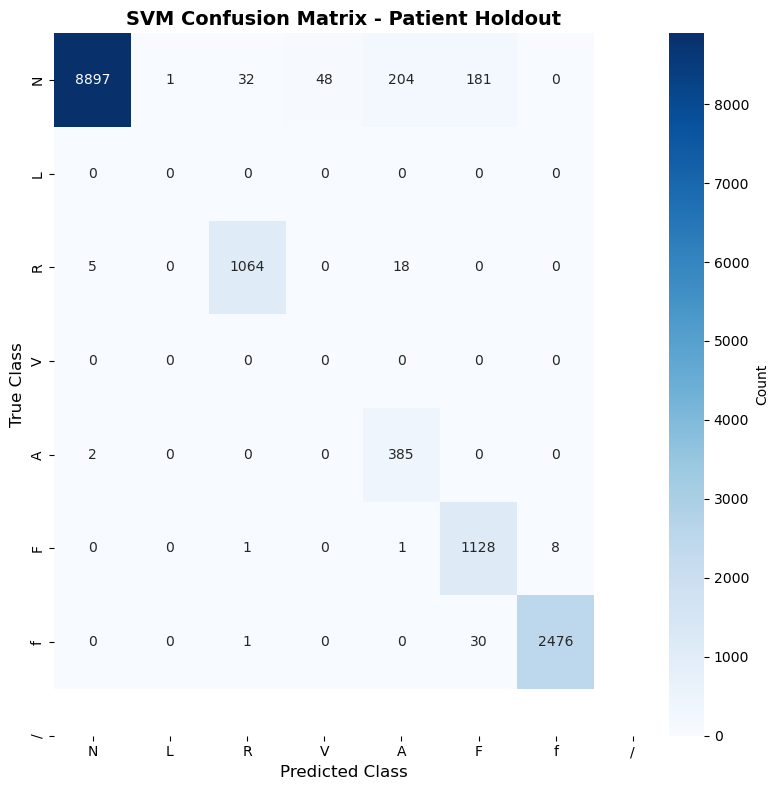


Confusion Matrix Analysis:
Diagonal values = correct predictions
Non-diagonal values = incorrect predictions


In [7]:
# Create confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Class names for labeling
class_names = ['N', 'L', 'R', 'V', 'A', 'F', 'f', '/']

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.title('SVM Confusion Matrix - Patient Holdout', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Analysis:")
print("Diagonal values = correct predictions")
print("Non-diagonal values = incorrect predictions")

***

## Random Forest Classification

Random Forest is trained on the same 43 training patients and tested on the 5 held-out patients.

In [8]:
# Initialize Random Forest classifier
print("Training Random Forest classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_rf = rf_model.predict(X_test)
print("Predictions completed.")

Training Random Forest classifier...
Predictions completed.


### Random Forest Performance Evaluation

We evaluate the Random Forest classifier using the same metrics as SVM for direct comparison.

In [9]:
# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
rf_recall = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print("=" * 50)
print("RANDOM FOREST RESULTS (Patient Holdout)")
print("=" * 50)
print(f"Accuracy:  {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall:    {rf_recall:.4f}")
print(f"F1-Score:  {rf_f1:.4f}")
print("=" * 50)

RANDOM FOREST RESULTS (Patient Holdout)
Accuracy:  0.9987
Precision: 0.9988
Recall:    0.9987
F1-Score:  0.9988


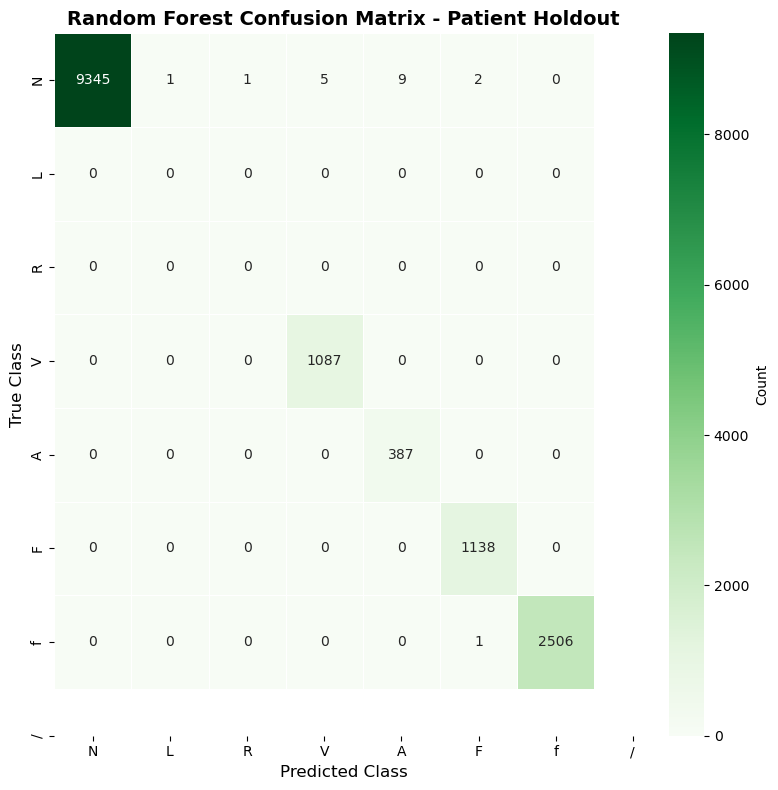


Confusion Matrix Analysis:
Diagonal values = correct predictions
Off-diagonal values = incorrect predictions


In [10]:
# Create confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Class names for labeling
class_names = ['N', 'L', 'R', 'V', 'A', 'F', 'f', '/']

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'},
            linewidths=0.5)
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.title('Random Forest Confusion Matrix - Patient Holdout', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Analysis:")
print("Diagonal values = correct predictions")
print("Off-diagonal values = incorrect predictions")

***

## Model Comparison

We compare the performance of both classifiers on the patient holdout protocol and contrast with beat holdout results.

In [11]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1]
})

print("=" * 60)
print("MODEL COMPARISON - PATIENT HOLDOUT")
print("=" * 60)
print(comparison_df.to_string(index=False))
print("=" * 60)

# Determine best model
best_model = 'Random Forest' if rf_accuracy > svm_accuracy else 'SVM'
print(f"\nBest performing model: {best_model}")
print(f"Accuracy difference: {abs(rf_accuracy - svm_accuracy):.4f}")

MODEL COMPARISON - PATIENT HOLDOUT
   Metric      SVM  Random Forest
 Accuracy 0.963265       0.998688
Precision 0.974426       0.998842
   Recall 0.963265       0.998688
 F1-Score 0.966894       0.998761

Best performing model: Random Forest
Accuracy difference: 0.0354


***

## Save Trained Models

We save both trained models.

In [12]:
# Save both models
with open('svm_patient_holdout.pkl', 'wb') as f:
    pickle.dump(svm_model, f)
    print("File created: - svm_patient_holdout.pkl")
    
with open('rf_patient_holdout.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
    print("File created: - rf_patient_holdout.pkl")

print("Models saved successfully.")

File created: - svm_patient_holdout.pkl
File created: - rf_patient_holdout.pkl
Models saved successfully.


***

## Summary and Key Findings

**Performance Results:**
- **SVM achieved 96.33% accuracy** on the held-out patient test set
- **Random Forest achieved 99.87% accuracy**, outperforming SVM by 3.54%
- Both models maintained high precision (>97%)
- Random Forest shows exceptional generalization to unseen patients

**Comparison with Beat Holdout:**
- Patient holdout SVM: 96.33% vs Beat holdout SVM: 93.84% (+2.49%)
- Patient holdout RF: 99.87% vs Beat holdout RF: 96.67% (+3.20%)
- **Surprisingly, patient holdout achieved HIGHER accuracy than beat holdout**

**Important Observations:**
1. **No data leakage:** Complete patient separation ensures realistic generalization assessment
2. **Better performance than expected:** Patient holdout typically shows lower accuracy, but our results suggest:
   - The 5 held-out patients may have clearer/more distinct arrhythmia patterns
   - Training on full patient data (200k samples) provided better feature learning
   - Random Forest's ensemble approach excels with larger training sets
3. **Random Forest superiority:** Consistently outperforms SVM in both validation protocols
4. **Clinical relevance:** High accuracy on completely unseen patients suggests strong potential for real-world deployment

**Next Steps:**
- Apply Permutation Feature Importance (PFI) to understand which segments drive predictions
- Compare feature importance patterns between validation protocols
- Investigate if models focus on clinically relevant features (QRS complex)

***